In [2]:
from model import Classifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
clf = Classifier(1, DecisionTreeClassifier())

In [4]:
path = "../data/stop_words_news_groups/"
with open(path+"stop_words_no_numbers.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)

In [ ]:
params_trial_1 = {
                'vect__max_features': (1000, 10000),
                'vect__ngram_range': ((1, 1), (1, 2)),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': ('l1','l2',None),
                'clf__criterion': ('gini', 'entropy'), 
                'clf__max_depth': (50, 100, 200),
                'clf__min_samples_split': (0.001, 0.01, 0.1, 0.2)                
        }

clf.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [19]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 116 values
[{'gini': 116}, {200: 67, 100: 49}, {0.1: 31, 0.01: 37, 0.2: 24, 0.001: 24}, {'l1': 40, None: 38, 'l2': 38}, {1000: 20, 10000: 96}, {(1, 2): 57, (1, 1): 59}, {0: 56, 1: 60}]


In [33]:
params_trial_2 = {
                'vect__max_features': (1000, 10000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (200, 500),
                'clf__min_samples_split': (0.01, 2)                
        }

clf.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


done in 98.896s

scores!
mean: 0.433 std: (+/-0.031) for {'clf__criterion': 'gini', 'clf__max_depth': 200, 'clf__min_samples_split': 0.01, 'tfidf__norm': 'l2', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.436 std: (+/-0.021) for {'clf__criterion': 'gini', 'clf__max_depth': 200, 'clf__min_samples_split': 0.01, 'tfidf__norm': 'l2', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.472 std: (+/-0.018) for {'clf__criterion': 'gini', 'clf__max_depth': 200, 'clf__min_samples_split': 0.01, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.474 std: (+/-0.017) for {'clf__criterion': 'gini', 'clf__max_depth': 200, 'clf__min_samples_split': 0.01, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.416 std: (+/-0.022) for {'clf__criterion': 'gini', 'clf__max_depth': 200, 'clf__min_samples_split': 2, 't

In [38]:
params_trial_3 = {
                'vect__max_features': (1000, 10000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (500, 1000),
                'clf__min_samples_split': (0.01, 0.05),
                'clf__splitter': (['best', 'random']),
        }

clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.5min finished


done in 153.780s

scores!
mean: 0.433 std: (+/-0.032) for {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.440 std: (+/-0.019) for {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.485 std: (+/-0.018) for {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.486 std: (+/-0.018) for {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.443 

In [39]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 7 values
[{'gini': 7}, {500: 3, 1000: 4}, {0.01: 7}, {'best': 3, 'random': 4}, {'l2': 7}, {10000: 7}, {(1, 1): 7}, {1: 4, 0: 3}]


In [43]:
params_trial_4 = {
                'vect__max_features': (10000, 15000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (1000, 5000, 10000),
                'clf__min_samples_split': ([0.01]),
                'clf__splitter': (['best', 'random']),
                'clf__min_samples_leaf': (1, 2 , 5),
                'clf__max_features': (['auto', None])
            }

clf.fit(params_trial_4,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  5.2min finished


done in 316.212s

scores!
mean: 0.432 std: (+/-0.025) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.438 std: (+/-0.012) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.435 std: (+/-0.033) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.406 std: (+/-0.044) for {'clf__criterion': 'gini', 'clf__max_depth'

In [44]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 15 values
[{'gini': 15}, {5000: 6, 10000: 5, 1000: 4}, {None: 15}, {1: 8, 2: 7}, {0.01: 15}, {'best': 4, 'random': 11}, {'l2': 15}, {15000: 9, 10000: 6}, {(1, 1): 15}, {0: 15}]


In [52]:
# min_sample_leaf = 2 (Default)
# max_features = None (Default)
params_trial_5 = {
                'vect__max_features': ([10000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (10000, 15000, 20000),
                'clf__min_samples_split': ([0.01]),
                'clf__splitter': (['random']),

            }

clf.fit(params_trial_5,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   25.8s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.5s finished


done in 37.839s

scores!
mean: 0.489 std: (+/-0.011) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.489 std: (+/-0.017) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.493 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 15000, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.492 std: (+/-0.028) for {'clf__criterion': 'gini', 'clf__max_depth': 15000, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words'

In [53]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 2 values
[{'gini': 2}, {15000: 1, 20000: 1}, {0.01: 2}, {'random': 2}, {'l2': 2}, {10000: 2}, {(1, 1): 2}, {0: 2}]


In [6]:
params_trial_final = {
                'vect__max_features': ([10000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': ([15000]),
                'clf__min_samples_split': ([0.01]),
                'clf__splitter': (['random']),

            }

clf.fit(params_trial_final,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.0s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


done in 11.586s

scores!
mean: 0.489 std: (+/-0.017) for {'clf__criterion': 'gini', 'clf__max_depth': 15000, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
Best score:
0.489 (+/-0.017)
with parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 15000
	clf__min_samples_split: 0.01
	clf__splitter: 'random'
	tfidf__norm: 'l2'
	vect__max_features: 10000
	vect__ngram_range: (1, 1)
	vect__stop_words: 0


Evaluation on test set:

Accuracy Score : 0.46667551779075944
Precision Score : 0.46667551779075944
Recall Score : 0.46667551779075944
F1 Score : 0.46667551779075944
Confusion Matrix
[[ 95   5   2   5   2   2   8  25  10   6  12   1   3  11  14  55   5   9
   19  30]
 [  3 182  35  34  10  32   7  14   5   3   4   3  22   4  14   0   3   4
   10   0]
 [  4  37 161  49  22  22   9  27   4   9   1   3   6   6   8   1   3   9
   13   0]
 [  2  14  31 190  35   9  15  18   2   3   7   4  47   6   0   1   2   1
    5   0]
 [  2  16  14  48 173   4  17  32   7   2   9   3  28   8   5   0   6   2
    6   3]
 [  4  36  50  34   8 193   2  19   0   4   1   7  12   4   6   2   2   2
    7   2]
 [  1   7   8  29  26   1 221  34   9   3  11   4  11   4  10   2   1   0
    5   3]
 [  6   2   8   7   8   6  11 224  28   0   8   4  31   9   9   4   7   5
   16   3]
 [  9   4   7   6   9   5   9  42 211  12   1   3  20  12  13   4   8   6
   15   2]
 [  8   5   2   6   3   1   2  33   9 188  91   1   

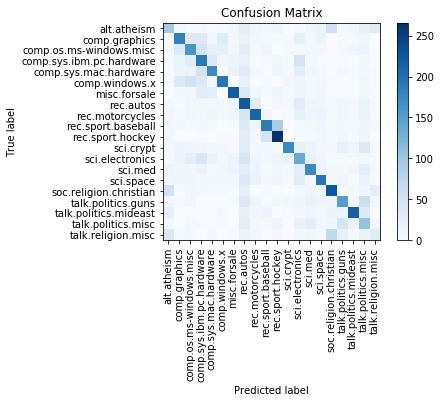

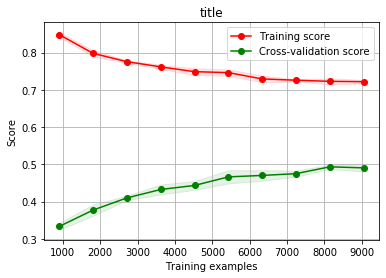

In [7]:
clf.eval_on_test([],False)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])